## Feature Analysis

### Importing Libraries

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
import defaults

### Loading Features

In [3]:
# Features Path
features_path = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/features"

features = {}
for filename in os.listdir(features_path):
    features_data = pd.read_csv(os.path.join(features_path, filename)).to_numpy()[:,1:]
    features[os.path.splitext(filename)[0]] = []

    for i in range(0,len(features_data),10):
        if len(features_data[i:i+10])-5 > 0:
            index = np.random.randint(0, len(features_data[i:i+10])-5, 1)[0]
            features[os.path.splitext(filename)[0]].append(np.mean(features_data[i:i+10][index:index+5], axis=0))
        else:
            continue

    features[os.path.splitext(filename)[0]] = np.asarray(features[os.path.splitext(filename)[0]])


features = dict(sorted(features.items()))

### SI vs TI

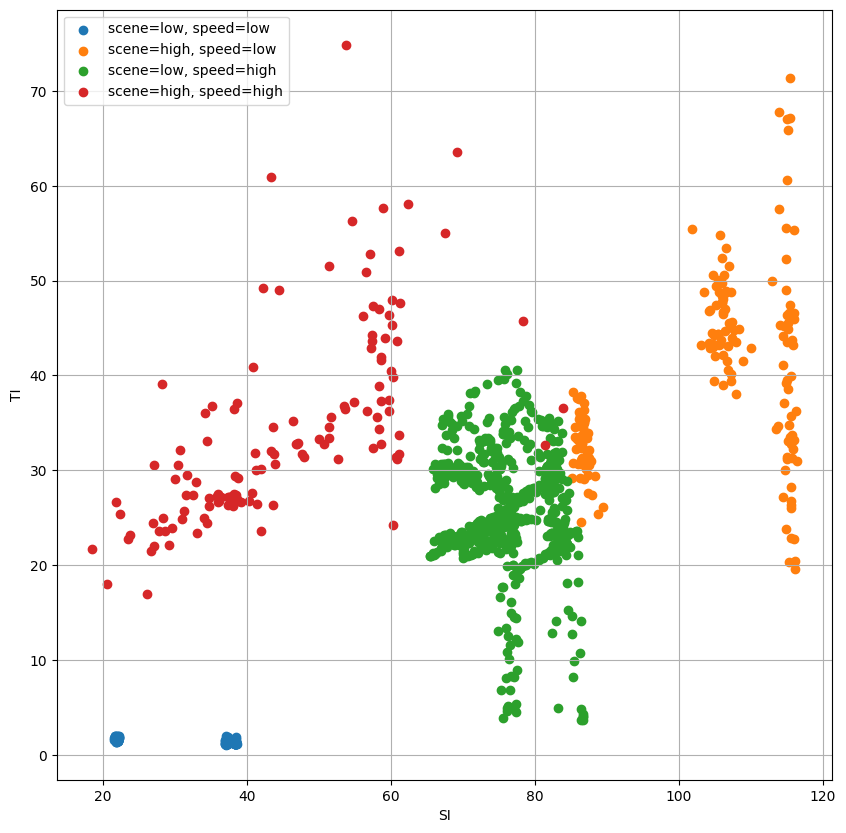

In [4]:
# Plotting Figure
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel('SI')
plt.ylabel("TI")

NUM_COLORS = 12
cm = plt.get_cmap('jet')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

Data = [[],[],[],[]]

for i, key in enumerate(features.keys()):
    value = features[key]
    mode = int(key.split("_")[0][-1])
    Data[mode].append(value.tolist())
    # plt.scatter(value[:,0], value[:,1], label="{}".format(key), c=colors[i])


for i in range(4):
    data = np.concatenate(Data[i], axis=0)
    if i == 0 or i == 2:
        plt.scatter(data[:,1], data[:,3], label="scene=low, speed={}".format("low" if i==0 else "high"))
    else:
        plt.scatter(data[:,1], data[:,3], label="scene=high, speed={}".format("low" if i==1 else "high"))

plt.legend()
plt.show()

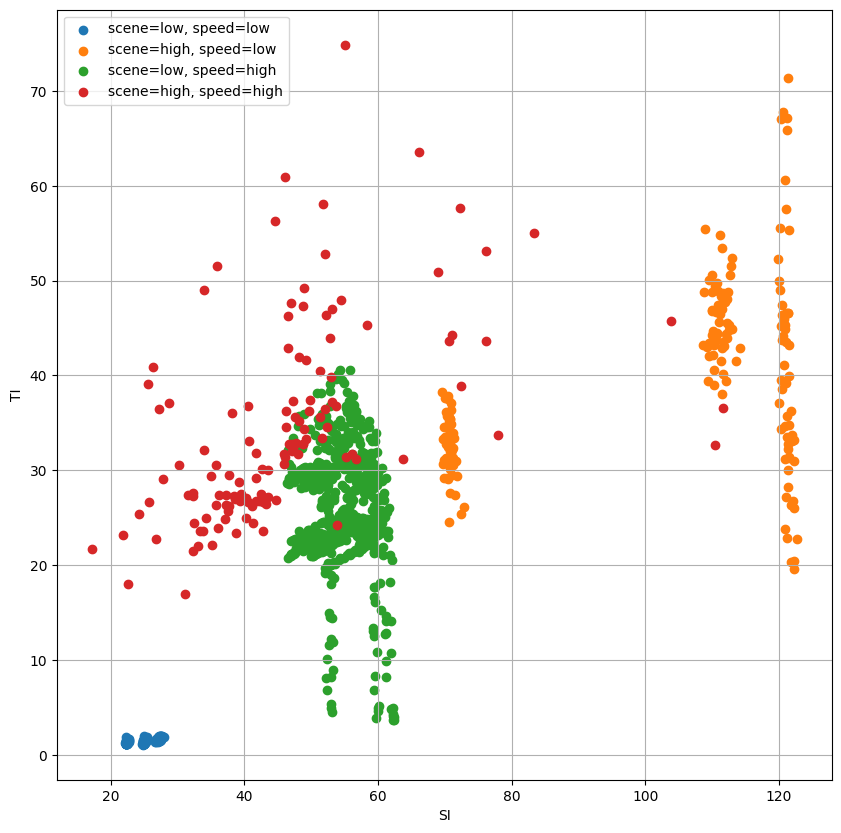

In [5]:
# Plotting Figure
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel('SI')
plt.ylabel("TI")

NUM_COLORS = 12
cm = plt.get_cmap('jet')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

Data = [[],[],[],[]]

for i, key in enumerate(features.keys()):
    value = features[key]
    mode = int(key.split("_")[0][-1])
    Data[mode].append(value.tolist())
    # plt.scatter(value[:,0], value[:,1], label="{}".format(key), c=colors[i])


for i in range(4):
    data = np.concatenate(Data[i], axis=0)
    if i == 0 or i == 2:
        plt.scatter(data[:,0], data[:,3], label="scene=low, speed={}".format("low" if i==0 else "high"))
    else:
        plt.scatter(data[:,0], data[:,3], label="scene=high, speed={}".format("low" if i==1 else "high"))

plt.legend()
plt.show()